# WP1 - Anomaly subgraph extraction: Finding anomalies

In [44]:
from importlib import reload
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import networkx.algorithms.isomorphism as iso
from anomaly_detection import detect_anomalies
from temporal_graph_generation import sample_subgraph, sample_subgraph_with_timestamp_constraint, add_timesteps_to_graph
import correlation

In [45]:
reload(correlation)

<module 'correlation' from '/Users/lisa/Documents/GitHub/Spatio-Temporal-Graphs/src/correlation.py'>

In [2]:
graph = nx.read_graphml("../data/causality_chi2.graphml")
graph = graph.to_undirected()

/Users/lisa/opt/anaconda3/envs/graphs_ml/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id id. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/Users/lisa/opt/anaconda3/envs/graphs_ml/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id labels. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/Users/lisa/opt/anaconda3/envs/graphs_ml/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id causal. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/Users/lisa/opt/anaconda3/envs/graphs_ml/lib/python3.9/site-packages/networkx/readwrite/graphml.py:1032: UserWarning: No key type for id label. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")


In [3]:
graph = nx.convert_node_labels_to_integers(graph)

In [4]:
full_data = pd.read_csv('../data/loadtest-timestamp.csv')
full_data[['Date', 'Time']] = full_data['Time'].str.split(" ", expand=True)
full_data = full_data.sort_values(by=['Date','Time'])
full_data

,Unnamed: 0,Time,carts,carts-db,catalogue,catalogue-db,front-end,orders,orders-db,payment,queue-master,rabbitmq,session-db,shipping,user,user-db,Date
674,674,11:27,0.00245,0.00824,0.00129,0.001150,0.00313,0.00260,0.00901,0.001250,0.00254,0.0145,0.00232,0.00223,0.00178,0.00942,10/14/2021
675,675,11:28,0.00279,0.01020,0.00128,0.001080,0.00352,0.00273,0.00974,0.001310,0.00249,0.0136,0.00268,0.00235,0.00191,0.01060,10/14/2021
676,676,11:29,0.00345,0.00929,0.00140,0.001180,0.00379,0.00262,0.00938,0.001370,0.00329,0.0132,0.00260,0.00214,0.00198,0.01020,10/14/2021
677,677,11:30,0.00233,0.00890,0.00108,0.001120,0.00343,0.00227,0.00783,0.001300,0.00239,0.0113,0.00223,0.00221,0.00173,0.00869,10/14/2021
678,678,11:31,0.00421,0.00914,0.00148,0.001380,0.00405,0.00297,0.00980,0.001410,0.00250,0.0127,0.00259,0.00234,0.00233,0.01030,10/14/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,527,20:33,0.00312,0.01000,0.00139,0.000967,0.00300,0.00320,0.00924,0.001150,0.00214,0.0152,0.00238,0.00187,0.00234,0.00920,3/2/2022
528,528,20:34,0.00252,0.01080,0.00116,0.001060,0.00311,0.00259,0.01050,0.001480,0.00210,0.0118,0.00260,0.00220,0.00195,0.00965,3/2/2022
529,529,20:35,0.00311,0.01030,0.00134,0.001460,0.00366,0.00278,0.01060,0.001330,0.00222,0.0122,0.00247,0.00271,0.00237,0.01090,3/2/2022
530,530,20:36,0.00220,0.01030,0.00102,0.000994,0.00334,0.00458,0.00998,0.000969,0.00222,0.0128,0.00241,0.00213,0.00180,0.00955,3/2/2022


In [5]:
detect_anomalies(full_data, graph, ['2/17/2022', '3/2/2022'], ['10/14/2021', '10/19/2021', '10/20/2021'])

Node names from data csv:  ['carts', 'carts-db', 'catalogue', 'catalogue-db', 'front-end', 'orders', 'orders-db', 'payment', 'queue-master', 'rabbitmq', 'session-db', 'shipping', 'user', 'user-db']
Node names from graph:  ['carts', 'carts-db', 'catalogue', 'catalogue-db', 'front-end', 'master', 'orders', 'orders-db', 'payment', 'queue-master', 'rabbitmq', 'session-db', 'shipping', 'user', 'user-db', 'worker1', 'worker2']
Nodes in graph but not in data csv:  ['master', 'worker1', 'worker2']
Nodes in data csv but not in graph:  []


100%|██████████| 589/589 [00:00<00:00, 3544.58it/s]


Traceback (most recent call last):
  File "/Users/lisa/Documents/GitHub/Spatio-Temporal-Graphs/src/anomaly_detection.py", line 28, in detect_anomalies
    s.initialize(verbose=False) 		# initialization step
  File "/Users/lisa/Documents/GitHub/Spatio-Temporal-Graphs/src/spot.py", line 199, in initialize
    g,s,l = self._grimshaw()
  File "/Users/lisa/Documents/GitHub/Spatio-Temporal-Graphs/src/spot.py", line 345, in _grimshaw
    right_zeros = SPOT._rootsFinder(lambda t: w(self.peaks,t),
  File "/Users/lisa/Documents/GitHub/Spatio-Temporal-Graphs/src/spot.py", line 238, in _rootsFinder
    X0 = np.arange(bounds[0]+step,bounds[1],step)
ValueError: arange: cannot compute length



/Users/lisa/Documents/GitHub/Spatio-Temporal-Graphs/src/spot.py:238: RuntimeWarning: invalid value encountered in double_scalars
  X0 = np.arange(bounds[0]+step,bounds[1],step)


In [6]:
remove_edges = [e for e in graph.edges(data=True) if e[2].get('causal')!='true']
graph.remove_edges_from(remove_edges)


In [7]:
frontend_node = [n for n in graph.nodes.data() if n[1]["id"] == "front-end"][0]

### Sample subgraph with dfs/bfs tree combination

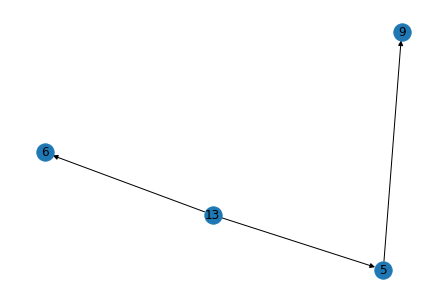

In [8]:
MAXLAG = 2
DATETIME_FORMAT = "%m/%d/%Y %H:%M"

tg= sample_subgraph_with_timestamp_constraint(graph, frontend_node[0], bfs_prob=0.5, random_seed=111, start_timestamp='3/2/2022 13:22', datetime_format=DATETIME_FORMAT, maxlag=MAXLAG)
nx.draw(tg, with_labels=True)

In [9]:
np.random.seed(111)
subgraphs = []
for seed in tqdm(np.random.choice(10000000, 50000)):
    #bfs_bias = np.random.uniform(0,1)
    for bfs_prob in [0.1, 0.5, 0.9]:
        subgraph = sample_subgraph(graph, frontend_node[0], max_nodes=6, bfs_prob=bfs_prob, random_seed=seed)
        if subgraphs:
            if not np.any([nx.is_isomorphic(subgraph, s) for s in subgraphs]):
                subgraphs.append(subgraph)
        else:
            subgraphs.append(subgraph)
#nx.draw(subgraph, with_labels=True)

100%|██████████| 50000/50000 [03:01<00:00, 274.80it/s]


In [10]:
subgraphs

In [11]:
np.save('apg_unique_subgraphs_static.npy', correlation.encode_graphs(subgraphs))

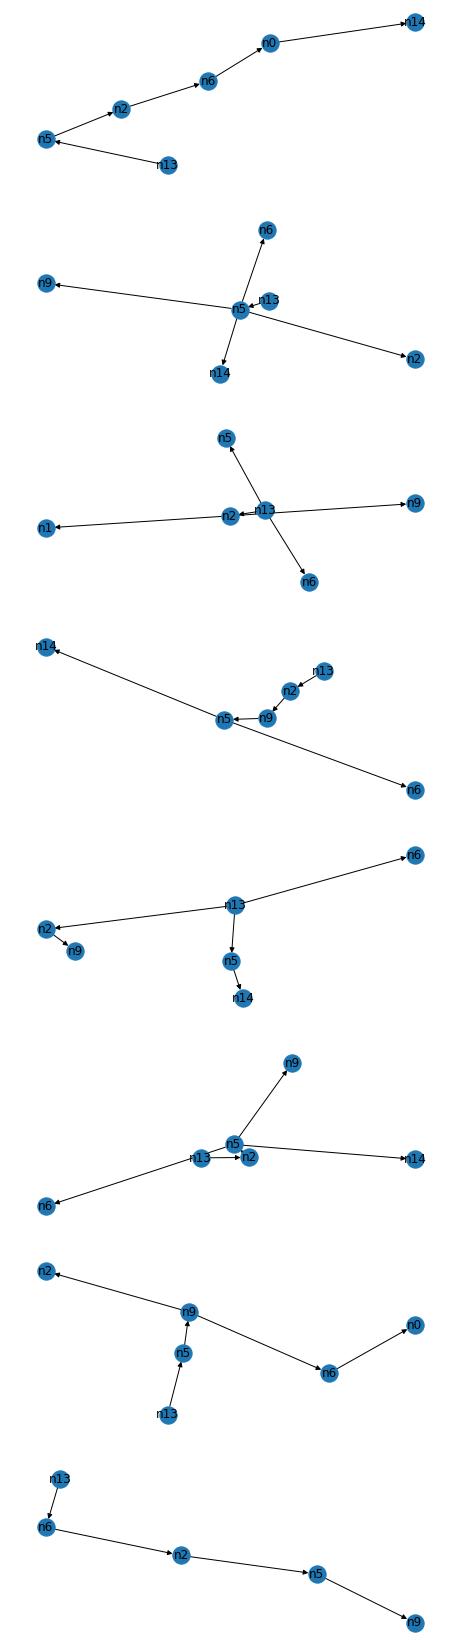

In [62]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(subgraphs), 1, figsize=(8,30))
for i, subgraph in enumerate(subgraphs):
    nx.draw(subgraph, ax=axes[i], with_labels=True)

In [17]:
subgraphs = []
em = iso.numerical_edge_match("timestep", 0)
for seed in tqdm(np.random.choice(10000000, 50000)):
    #bfs_bias = np.random.uniform(0,1)
    for bfs_prob in [0.1, 0.5, 0.9]:
        subgraph = sample_subgraph(graph, frontend_node[0], max_nodes=6, bfs_prob=bfs_prob, random_seed=seed)
        add_timesteps_to_graph(subgraph, frontend_node[0], random_seed=seed)
        if subgraphs:
            if not np.any([nx.is_isomorphic(subgraph, s, edge_match=em) for s in subgraphs]):
                subgraphs.append(subgraph)
        else:
            subgraphs.append(subgraph)

100%|██████████| 50000/50000 [11:10<00:00, 74.59it/s] 


In [41]:
subgraphs

In [43]:
np.save('apg_unique_subgraphs_temporal.npy', correlation.encode_temporal_graphs(subgraphs))

In [47]:
read_apg = correlation.decode_temporal_graphs(np.load('apg_unique_subgraphs_temporal.npy'))

{(13, 2): Text(-0.17034994149457766, -0.20308064091382372, '1'),
 (13, 5): Text(0.2423642713468261, 0.37651511004615545, '3'),
 (13, 6): Text(0.2907236445191546, -0.5155884247756041, '0'),
 (2, 9): Text(-0.5566246648994092, -0.4074869263518304, '2'),
 (5, 14): Text(0.26590102038025454, 0.9230753511274346, '4')}

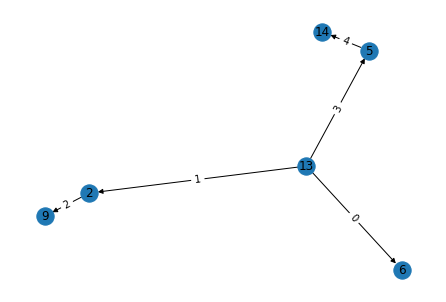

In [56]:
nx.draw(read_apg[15], nx.spring_layout(read_apg[15], seed=7), with_labels=True)
edge_labels = nx.get_edge_attributes(read_apg[15], "timestep")
nx.draw_networkx_edge_labels(read_apg[15], nx.spring_layout(read_apg[15], seed=7), edge_labels)

{(13, 2): Text(-0.17034994149457766, -0.20308064091382372, '1'),
 (13, 5): Text(0.2423642713468261, 0.37651511004615545, '3'),
 (13, 6): Text(0.2907236445191546, -0.5155884247756041, '0'),
 (2, 9): Text(-0.5566246648994092, -0.4074869263518304, '2'),
 (5, 14): Text(0.26590102038025454, 0.9230753511274346, '4')}

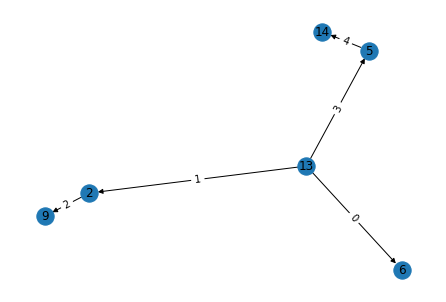

In [57]:
nx.draw(subgraphs[15], nx.spring_layout(subgraphs[15], seed=7), with_labels=True)
edge_labels = nx.get_edge_attributes(subgraphs[15], "timestep")
nx.draw_networkx_edge_labels(subgraphs[15], nx.spring_layout(subgraphs[15], seed=7), edge_labels)

{(13, 2): Text(-0.08277929173787942, 0.0954409040775308, '2'),
 (13, 5): Text(0.5616704821946441, -0.10523982900993561, '1'),
 (13, 6): Text(0.024099151517029342, -0.5844970356444581, '0'),
 (2, 1): Text(-0.6677576013411897, 0.10444199492687452, '4'),
 (2, 9): Text(-0.0007913241083633282, 0.6807357738050501, '3')}

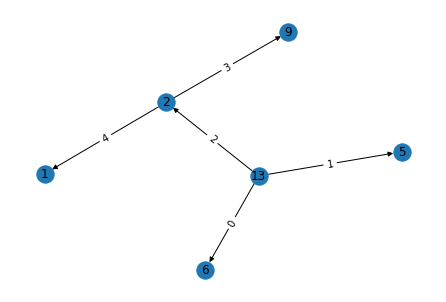

In [19]:
nx.draw(subgraph, nx.spring_layout(subgraph, seed=7), with_labels=True)
edge_labels = nx.get_edge_attributes(subgraph, "timestep")
nx.draw_networkx_edge_labels(subgraph, nx.spring_layout(subgraph, seed=7), edge_labels)
#plt.tight_layout()


In [61]:
tn_subgraphs = []
em = iso.numerical_edge_match("timestep", 0)
for seed in tqdm(np.random.choice(10000000, 5000)):
    max_nodes_no = np.random.choice(range(2,6))
    for bfs_prob in [0.1, 0.5, 0.9]:
        tn_subgraph = sample_subgraph(graph, frontend_node[0], max_nodes=max_nodes_no, bfs_prob=bfs_prob, random_seed=seed)
        add_timesteps_to_graph(tn_subgraph, frontend_node[0], random_seed=seed)
        if tn_subgraphs:
            if not np.any([nx.is_isomorphic(tn_subgraph, s, edge_match=em) for s in tn_subgraphs]):
                tn_subgraphs.append(subgraph)
        else:
            tn_subgraphs.append(subgraph)

100%|██████████| 5000/5000 [25:08<00:00,  3.31it/s]


In [62]:
np.save('apg_unique_subgraphs_temporal_node2-6.npy', correlation.encode_temporal_graphs(tn_subgraphs))

In [64]:
len(tn_subgraphs)

15000

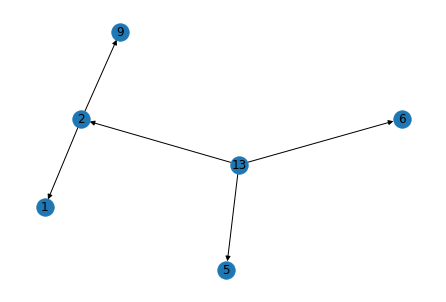

In [69]:
nx.draw(tn_subgraphs[10000], with_labels=True)

### Test temporal centralities

In [12]:
edge_df = nx.to_pandas_edgelist(subgraph)
edge_df.columns = ['i','j','t']
edge_df = edge_df.replace(to_replace=r'^n', value='', regex=True)
edge_df = edge_df.apply(pd.to_numeric)
edge_df

,i,j,t
0,13,2,3
1,13,5,0
2,13,6,2
3,2,1,4
4,5,14,1


In [13]:
add_edges = []
max_time = np.max(edge_df['t'])
for i in edge_df.index:
    row = edge_df.iloc[i]
    times_to_add = np.arange(row["t"], max_time+1)
    for t_to_add in times_to_add:
        add_edges.append([row["i"], row["j"], t_to_add])

In [14]:
fill_edges = pd.DataFrame(add_edges, columns=edge_df.columns)
fill_edges

,i,j,t
0,13,2,3
1,13,2,4
2,13,5,0
3,13,5,1
4,13,5,2
5,13,5,3
6,13,5,4
7,13,6,2
8,13,6,3
9,13,6,4


In [14]:
#%pip install teneto

In [ ]:
from teneto import TemporalNetwork
import teneto
tnet = TemporalNetwork(from_df=fill_edges)

In [16]:
tnet.network

,i,j,t
0,13,2,3
1,13,2,4
2,13,5,0
3,13,5,1
4,13,5,2
5,13,5,3
6,13,5,4
7,13,6,2
8,13,6,3
9,13,6,4


In [17]:
closeness_centrality =  teneto.networkmeasures.temporal_closeness_centrality(tnet=tnet)

/Users/lisa/opt/anaconda3/envs/graphs_ml/lib/python3.9/site-packages/teneto/networkmeasures/temporal_closeness_centrality.py:76: RuntimeWarning: Mean of empty slice
  closeness = np.nansum(1 / np.nanmean(pathmat, axis=2),


In [20]:
temporal_closeness_vectors = []
temporal_betweenness_vectors = []
for s in subgraphs:
   edge_list = get_complete_teneto_edgelist(s)
   tnet = TemporalNetwork(from_df=edge_list)
   closeness_centrality =  teneto.networkmeasures.temporal_closeness_centrality(tnet=tnet)
   temporal_closeness_vectors.append(closeness_centrality)
   betweenness_centrality = teneto.networkmeasures.temporal_betweenness_centrality(tnet=tnet)
   temporal_betweenness_vectors.append(betweenness_centrality)

,i,j,t,c
0,13,2,3,0.000000
1,13,2,4,0.000000
2,13,5,0,0.023810
3,13,5,1,0.000000
4,13,5,2,0.000000
5,13,5,3,0.059524
6,13,5,4,0.000000
7,13,6,2,0.000000
8,13,6,3,0.000000
9,13,6,4,0.000000


In [21]:
existing_temporal_paths = teneto.networkmeasures.shortest_temporal_path(tnet, minimise='temporal_distance')
existing_temporal_paths.dropna(how='all', subset=['path includes'])

In [ ]:
#degree centrality
pd.Series(teneto.networkmeasures.temporal_degree_centrality(tnet=tnet))

In [26]:
betweenness_centrality =  teneto.networkmeasures.temporal_betweenness_centrality(tnet=tnet)
betweenness_centrality

### Check anomaly timestamps

In [23]:
print(frontend_node[1]["anomaly_timestamps"])

['3/2/2022 11:50', '3/2/2022 13:22', '3/2/2022 15:47', '3/2/2022 17:48']


In [24]:
print([graph.nodes[node] for node in list(graph.neighbors(frontend_node[0]))])

[{'labels': ':Node', 'id': 'user-db'}, {'labels': ':Node', 'id': 'orders-db', 'anomaly': True, 'anomaly_timestamps': ['3/2/2022 12:13', '3/2/2022 13:22', '3/2/2022 13:23', '3/2/2022 17:39', '3/2/2022 19:41']}, {'labels': ':Node', 'id': 'carts-db', 'anomaly': True, 'anomaly_timestamps': ['3/2/2022 13:22', '3/2/2022 13:23']}]
